# Dominik Sawicki 145402, Sebastian Szczepaniak 145280
## Grupa 7.1

In [7]:
from skimage import io, filters, color, morphology, feature, measure, segmentation
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

task_1_path = './images/zad1/'
task_2_path = './images/zad2/'
save_path = './images/results/'

# Zadanie na 3.0

In [2]:
def find_contours(image):
    contours = measure.find_contours(image, fully_connected='high', positive_orientation='high')
    return contours

def preprocess_image_task_1(image):
    img = color.rgb2gray(image)
    img = filters.gaussian(img, sigma=2)
    
    return img

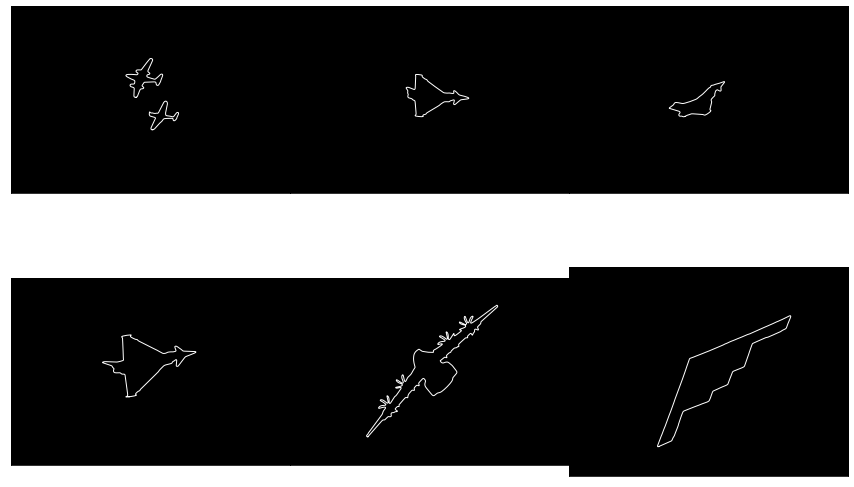

In [3]:
figure, axes = plt.subplots(2, 3, figsize=(15, 10))
row = 0
for i, file in enumerate(os.listdir(task_1_path), start=0):
    img = io.imread(f'{task_1_path}{file}')
    h, w = img.shape[0], img.shape[1]
    black_img = np.zeros((h, w))  # the background
    img = preprocess_image_task_1(img)
    contours = find_contours(img)
    axes[row, i % 3].imshow(black_img, cmap='gray')  # plotting the background
    for contour in contours:
        axes[row, i % 3].plot(contour[:, 1], contour[:, 0], linewidth=1, color='w')  # plotting the contours
    axes[row, i % 3].set_xticks([])  # removing axis scales
    axes[row, i % 3].set_yticks([])
    if i == 2: row+=1
figure.subplots_adjust(wspace=0, hspace=0)
plt.show()

# Zadanie na 5.0

In [213]:
colors = [(124, 53, 232), (56, 223, 242), (114, 219, 61), (242, 187, 56), (232, 57, 49),
            (245,45,77), (13,56,160),(144,56,120),(77,145,23),(45,14,78),
            (70, 110, 232), (73, 242, 145), (219, 212, 76), (242, 141, 73), (227, 65, 232),
            (98,156,45),(6,250,15),(11,15,166),
         ]

for i, file in enumerate(os.listdir(task_2_path), start=0):
    im = cv.imread(f'{task_2_path}{file}')
    im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
    # 
    img_gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
    img_blur2 = cv.medianBlur(img_gray, 7)
    img2 = cv.Canny(image=img_blur2, threshold1=55, threshold2=200)
    img2 = cv.morphologyEx(img2, cv.MORPH_CLOSE, cv.getStructuringElement(cv.MORPH_ELLIPSE, (21,21)));
    contours, hierarchy = cv.findContours(img2, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    
    major_contours = []
    
    if len(contours) == 1:
        major_contours.append(contours[0])
    
    for k in range(len(contours)):
        if hierarchy[0][k][2] != -1:
            major_contours.append(contours[k])
    
    for j, c in enumerate(major_contours, start=0):
        M = cv.moments(c)
        if M['m00'] != 0:
            cx = int(M['m10']/M['m00'])
            cy = int(M['m01']/M['m00'])
            cv.drawContours(im, [c], -1, colors[j % 18], 2)
            cv.circle(im, (cx, cy), 7, (255, 255, 255), -1)
    
    im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
    cv.imwrite(f'{save_path}{file}', im)
print(f"Zdjecia wygenerowane do katalogu: {save_path}")

Zdjecia wygenerowane do katalogu: ./images/results/


In [ ]:
+